In [32]:
import numpy as np
import scipy as sp
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

I extracted precipitations records for Willmington from 2000/01/01 through today. 
The goal is to extract from these data the daily precipitation starting on 2018/01/01 and assess if these data are different from a population with mean $\mu = 0.14$ standard deviation $\sigma= 0.38$. 

Set a p-value at $3\sigma$:  $p=0.007$

In [5]:
rd = "https://raw.githubusercontent.com/fedhere/DSPS/master/labs/1865331.csv"
rain = pd.read_csv(rd)


The $Z$ statistics is : $Z = \frac{\bar{X} - \mu }{s}$ and $s = \sigma / \sqrt(N)$ (you should know what all those symbols mean)

1. Extract from the dataframe above the columns "DATE" and "PRCP" (precipitation)

2. Convert the dataframe DATE from ```string``` to ```datetime``` type
 using pd.datetime() 
    
3. Select the data rows with date later than 2018/01/01. 
    If your data type conversion worked well you should be able to set the condition as ```rain[<newcolumnname>]> pd.to_datetime("2018/01/01")```
    use the technique called "broadcasting" to select the rows: 
    
    ```rain[ rain[<newcolumnname>]> pd.to_datetime("2018/01/01")]``` which you can save as a new dataframe
    
4. Calculate the mean of the sample you created $\bar{X}$ and plug it in  the numerator of the $Z$ statistics: $\bar{X}- \mu$

5. Calculate the size of the sample and plug it in the formula. Now you have $Z$

6. Knowing the distribution of $Z\sim N(\mu=0, \sigma=1)$ and with a confidence $p=0.007$, did you find that the time period 2018/01/01---today has a statistically significant different amount of rain?  
    

In [8]:
rain.head()

,STATION,NAME,DATE,PRCP,SNOW,SNWD,WESD,WESF
0,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-01,0.28,NaN,0.0,NaN,NaN
1,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-02,0.00,0.0,NaN,NaN,NaN
2,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-03,0.00,0.0,NaN,NaN,NaN
3,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-04,0.00,0.0,NaN,NaN,NaN
4,US1DENC0010,"NEWPORT 2.4 WNW, DE US",2010-01-05,0.00,NaN,NaN,NaN,NaN


In [12]:
# Overwrite data since we only care about these columns
colnames = ["DATE", "PRCP"]
rain = rain[colnames]
rain.head()

,DATE,PRCP
0,2010-01-01,0.28
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-05,0.00


In [19]:
rain.DATE = pd.to_datetime(rain.DATE)
rain.head()

,DATE,PRCP
0,2010-01-01,0.28
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-05,0.00


In [24]:
threshold_date = pd.to_datetime("2018/01/01")
rain = rain[rain.DATE > threshold_date]
rain.head()

,DATE,PRCP
2923,2018-01-02,0.00
2924,2018-01-03,0.00
2925,2018-01-04,0.07
2926,2018-01-05,0.20
2927,2018-01-06,0.00


In [31]:
mu = 0.14
sigma = 0.38

X_bar = rain.PRCP.mean()
N = rain.shape[0]

def Z_test(X_bar, mu, sigma, N):
    Z = (X_bar - mu) / (sigma / np.sqrt(N))
    return Z

Z = Z_test(X_bar, mu, sigma, N)
Z

1.4686385901934047

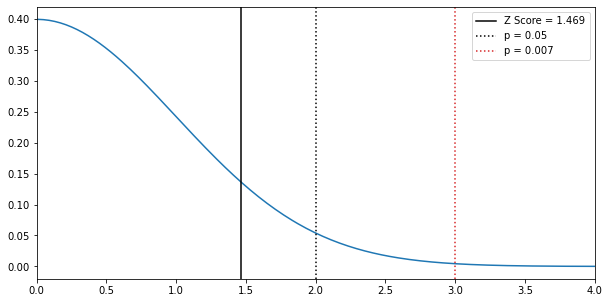

In [44]:
x = np.linspace(-10, 10, num=1000)
std_norm = sp.stats.norm.pdf(x, loc=0, scale=1)

plt.figure(figsize=(10, 5))
plt.plot(x, std_norm)
plt.axvline(x=Z, c="k", label=f"Z Score = {Z:.3f}")

plt.axvline(x=2, c="k", ls=":", label="p = 0.05")
plt.axvline(x=3, c="tab:red", ls=":", label="p = 0.007")

plt.xlim((0, 4))

plt.legend()
plt.show()

### Figure 1: We know that the null hypothesis is rejected if this Z-test is more extreme than our p-value. The hypothesis was that the rainfall in this particular period comes from a population of rainfall different from one with mu and sigma given above. Because the Z-test value was 1.4, and our threshold p-value was 0.007 (3 sigma), we can say that we do not reject this hypot